## Concrete Analysis
Hope College<br>
Intro to Engineering<br>
2020-2023 Labs<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import re

In [2]:
data = pd.read_excel('Concrete Beam Testing Results_Anonymous.xlsx')
data.drop(labels=0, axis='index', inplace=True)
data.reset_index(inplace=True, drop=True)
data.head()

,Timestamp,Date and approximate time tests were performed,Water to Cement Ratio,Maximum Load for Unreinforced Beam (lbf),Maximum Load for Reinforced Beam (lbf)
0,2020-08-25 20:05:14.162,2020-08-25 08:30:00,0.55,620.1272 lbf,"2,059.9807 lbf"
1,2020-08-25 21:20:12.812,2020-08-25 16:30:00,Tuesdays lab (0.50 ratio),436.48571lbf,2184.34074lbf
2,2020-08-26 21:25:19.644,2020-08-25 15:14:00,0.5,458.85 lbf,610.12 lbf
3,2020-08-27 12:05:53.101,2020-08-25 12:00:00,0.5,443.82,1540.28
4,2020-08-27 13:02:48.533,2020-08-25 17:30:00,0.5,597.02,1680.72


#### Data Cleaning


Cleaning up data and removing outliers due to human error. The data was inputted by hand so errors are possible. 

In [3]:
## Rename cols
data.columns = ['timestamp', 'testtime', 'wc_ratio', 'unreinforced', 'reinforced']
data.head()

,timestamp,testtime,wc_ratio,unreinforced,reinforced
0,2020-08-25 20:05:14.162,2020-08-25 08:30:00,0.55,620.1272 lbf,"2,059.9807 lbf"
1,2020-08-25 21:20:12.812,2020-08-25 16:30:00,Tuesdays lab (0.50 ratio),436.48571lbf,2184.34074lbf
2,2020-08-26 21:25:19.644,2020-08-25 15:14:00,0.5,458.85 lbf,610.12 lbf
3,2020-08-27 12:05:53.101,2020-08-25 12:00:00,0.5,443.82,1540.28
4,2020-08-27 13:02:48.533,2020-08-25 17:30:00,0.5,597.02,1680.72


In [4]:
## Standardize wc_ratio column to only be 0.5 or 0.55
data['wc_ratio'] = [0.55 if "Thursday" in str(val) or "55" in str(val) else 0.50 for val in data['wc_ratio']]


## Delete any rows with negative values
data.reset_index(inplace=True, drop=True)
data['reinforced'] = data['reinforced'].astype(str)
data = data[data['reinforced'].str.contains('-')==False]

data.reset_index(inplace=True, drop=True)
data['unreinforced'] = data['unreinforced'].astype(str)
data = data[data['unreinforced'].str.contains('-')==False]


## Strip "lbf" and other non-numeric characters from cols
data.reset_index(inplace=True, drop=True)
non_decimal = re.compile(r'[^\d.]+')
data['reinforced'] = pd.Series([non_decimal.sub("", figure) for figure in data['reinforced'].astype(str)])
data['unreinforced'] = pd.Series([non_decimal.sub("", figure) for figure in data['unreinforced'].astype(str)])

## Convert empty cells to None and convert column type to float.
data['reinforced'] = np.array([None if val == '' else val for val in data['reinforced']]).astype(float)
data['unreinforced'] = np.array([None if val == '' else val for val in data['unreinforced']]).astype(float)

## Machine cannot apply more than 6,000lbf of pressure, so strip any data points that contain values that exceed that
## because they are due to human error.
## Physically impossible for unreinforced concrete to withstand greater than 1,000 lbf of pressure.
data = data[data['unreinforced'] < 1000] 
data = data[data['reinforced'] < 6000]
data.reset_index(inplace=True, drop=True)


data

,timestamp,testtime,wc_ratio,unreinforced,reinforced
0,2020-08-25 20:05:14.162,2020-08-25 08:30:00,0.55,620.12720,2059.98070
1,2020-08-25 21:20:12.812,2020-08-25 16:30:00,0.50,436.48571,2184.34074
2,2020-08-26 21:25:19.644,2020-08-25 15:14:00,0.50,458.85000,610.12000
3,2020-08-27 12:05:53.101,2020-08-25 12:00:00,0.50,443.82000,1540.28000
4,2020-08-27 13:02:48.533,2020-08-25 17:30:00,0.50,597.02000,1680.72000
...,...,...,...,...,...
320,2023-10-05 13:08:38.428,2023-09-28 16:30:00,0.55,614.00000,1718.50000
321,2023-10-05 13:45:43.346,2023-09-28 16:30:00,0.55,452.82050,1910.07300
322,2023-10-05 14:05:48.096,2023-09-28 16:50:00,0.55,625.32570,2480.58600
323,2023-10-05 16:39:52.324,2023-09-28 12:45:00,0.55,471.49750,1694.77400


### Data Analysis

Splitting the data by water to cement ratio.

In [5]:
data50 = data[data['wc_ratio']==0.50]
data55 = data[data['wc_ratio']==0.55]

In [6]:
data50.describe()

,wc_ratio,unreinforced,reinforced
count,156.0,156.000000,156.000000
mean,0.5,540.614650,2102.137731
std,0.0,167.073453,604.373879
min,0.5,0.111710,339.019450
25%,0.5,460.089600,1724.963638
50%,0.5,565.545615,2084.486600
75%,0.5,649.439575,2421.421467
max,0.5,952.140030,4149.528000


In [7]:
data55.describe()

,wc_ratio,unreinforced,reinforced
count,1.690000e+02,169.000000,169.000000
mean,5.500000e-01,503.784213,1909.857108
std,1.113522e-16,159.219079,564.875316
min,5.500000e-01,1.000000,128.440920
25%,5.500000e-01,422.475830,1655.000000
50%,5.500000e-01,488.950000,1896.108000
75%,5.500000e-01,597.065220,2229.990580
max,5.500000e-01,880.000000,3179.486880


Text(0.5, 1.0, 'Overview of Concrete Formulations and Reinforcement')

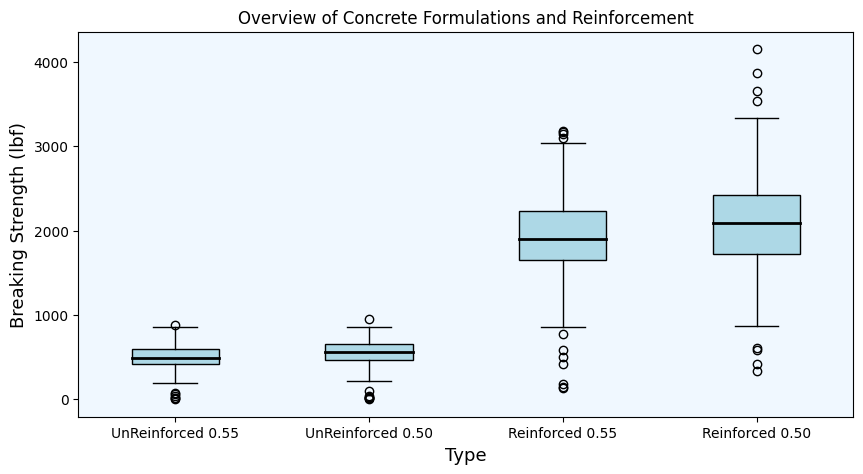

In [8]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)

vals = {'UnReinforced 0.55': data55['unreinforced'], 'UnReinforced 0.50': data50['unreinforced'], 'Reinforced 0.55': data55['reinforced'], 'Reinforced 0.50': data50['reinforced']}
ax.boxplot(vals.values(),patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'),
            medianprops=dict(color='black', linewidth=2),)
ax.set_facecolor('aliceblue')
ax.set_xticklabels(vals.keys())
ax.set_ylabel('Breaking Strength (lbf)', size = 13)
ax.set_xlabel('Type', size = 13)
ax.set_title('Overview of Concrete Formulations and Reinforcement')

Text(0.5, 1.0, 'Overview of Reinforced Concrete Formulations')

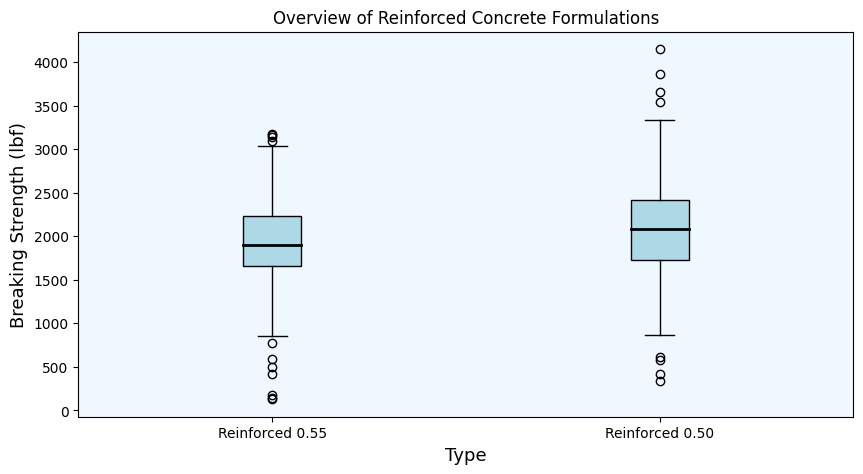

In [9]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)

vals = {'Reinforced 0.55': data55['reinforced'], 'Reinforced 0.50': data50['reinforced']}
ax.boxplot(vals.values(),patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'),
            medianprops=dict(color='black', linewidth=2),)
ax.set_facecolor('aliceblue')
ax.set_xticklabels(vals.keys())
ax.set_ylabel('Breaking Strength (lbf)', size = 13)
ax.set_xlabel('Type', size = 13)
ax.set_title('Overview of Reinforced Concrete Formulations')

Text(0.5, 1.0, 'Overview of Unreinforced Concrete Formulations')

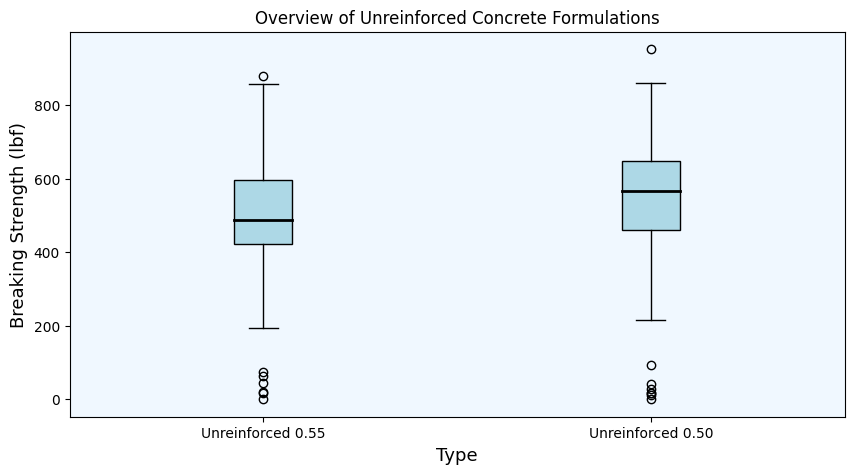

In [10]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)

vals = {'Unreinforced 0.55': data55['unreinforced'], 'Unreinforced 0.50': data50['unreinforced']}
ax.boxplot(vals.values(),patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'),
            medianprops=dict(color='black', linewidth=2),)
ax.set_facecolor('aliceblue')
ax.set_xticklabels(vals.keys())
ax.set_ylabel('Breaking Strength (lbf)', size = 13)
ax.set_xlabel('Type', size = 13)
ax.set_title('Overview of Unreinforced Concrete Formulations')

p-test comparison based on water to cement ratio. Is the difference in mean between each group statistically significant?

Null Hypothesis: The means are statistically the same. <br>
Alternative hypothesis. The means are statistically different.

In [11]:
## Reinforced
stats.ttest_ind(data50['reinforced'], data55['reinforced'], axis=0)

Ttest_indResult(statistic=2.9645948555978228, pvalue=0.00325629620510519)

In [12]:
## Unreinforced
stats.ttest_ind(data50['unreinforced'], data55['unreinforced'], axis=0)

Ttest_indResult(statistic=2.034645895460831, pvalue=0.042702936594808526)

The difference between the means in both cases is statistically significant.

Reinforced: <br>
p <0.005 <br>
There is less than a 0.5% chance that the difference in the means is due to random variation.

Unreinforced: <br>
p < 0.05<br>
There is less than a 5% chance that the difference in the means is due to random variation.

### Comparing Data Between Years

In [13]:
data2020 = data[data['timestamp'].dt.year == 2020]
data2021 = data[data['timestamp'].dt.year == 2021]
data2022 = data[data['timestamp'].dt.year == 2022]
data2023 = data[data['timestamp'].dt.year == 2023]

In [14]:
data2020_50 = data2020[data2020['wc_ratio']==0.50]
data2020_55 = data2020[data2020['wc_ratio']==0.55]

data2021_50 = data2021[data2021['wc_ratio']==0.50]
data2021_55 = data2021[data2021['wc_ratio']==0.55]

data2022_50 = data2022[data2022['wc_ratio']==0.50]
data2022_55 = data2022[data2022['wc_ratio']==0.55]

data2023_50 = data2023[data2023['wc_ratio']==0.50]
data2023_55 = data2023[data2023['wc_ratio']==0.55]

#### 0.50 Water to Concrete Ratio

In [15]:
data2020_50.describe()

,wc_ratio,unreinforced,reinforced
count,35.0,35.000000,35.000000
mean,0.5,426.382193,1673.908211
std,0.0,154.823768,510.004385
min,0.5,0.111710,339.019450
25%,0.5,384.822000,1534.468500
50%,0.5,443.328120,1728.398850
75%,0.5,485.319250,2010.590470
max,0.5,711.399200,2399.889450


In [16]:
data2021_50.describe()

,wc_ratio,unreinforced,reinforced
count,46.0,46.000000,46.000000
mean,0.5,605.112135,2280.418423
std,0.0,134.553585,466.753871
min,0.5,91.917280,869.089210
25%,0.5,525.604687,1988.232500
50%,0.5,603.039350,2253.825500
75%,0.5,681.312648,2606.223635
max,0.5,952.140030,3075.991000


In [17]:
data2022_50.describe()

,wc_ratio,unreinforced,reinforced
count,27.0,27.000000,27.000000
mean,0.5,588.767285,2181.182737
std,0.0,178.488465,548.915382
min,0.5,12.000000,865.961720
25%,0.5,559.890000,1851.530000
50%,0.5,604.247600,2286.000000
75%,0.5,655.495375,2475.000000
max,0.5,860.489310,3539.230000


In [18]:
data2023_50.describe()

,wc_ratio,unreinforced,reinforced
count,48.0,48.000000,48.000000
mean,0.5,535.013203,2199.073277
std,0.0,156.857413,678.470867
min,0.5,28.550000,1145.625290
25%,0.5,460.965250,1686.404880
50%,0.5,558.341950,2132.264055
75%,0.5,657.790900,2440.487480
max,0.5,778.145900,4149.528000


Text(0.5, 1.0, 'Unreinforced Concrete with a Water Ratio of 0.50')

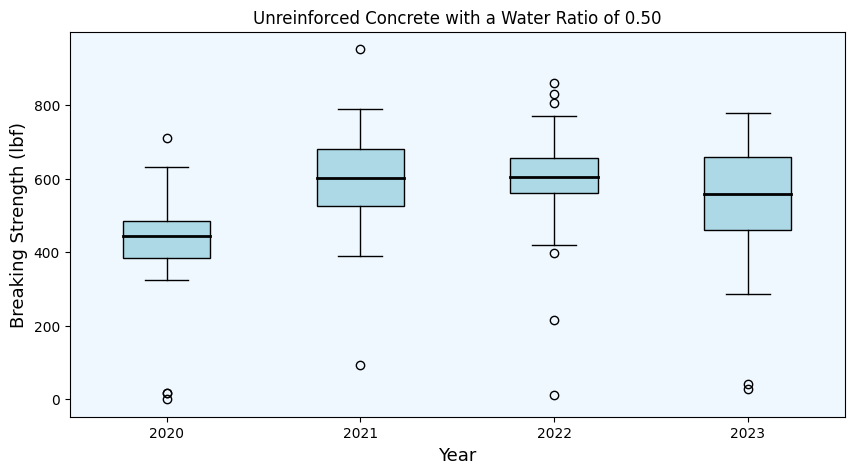

In [19]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)

vals = {'2020': data2020_50['unreinforced'], '2021': data2021_50['unreinforced'], '2022': data2022_50['unreinforced'], '2023': data2023_50['unreinforced']}
ax.boxplot(vals.values(),patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'),
            medianprops=dict(color='black', linewidth=2),)
ax.set_facecolor('aliceblue')
ax.set_xticklabels(vals.keys())
ax.set_ylabel('Breaking Strength (lbf)', size = 13)
ax.set_xlabel('Year', size = 13)
ax.set_title('Unreinforced Concrete with a Water Ratio of 0.50')

Based off of the visualizations, the data from 2020 may be significantly different from the other years.

#### 0.55 Water to Concrete Ratio

In [20]:
data2020_55.describe()

,wc_ratio,unreinforced,reinforced
count,42.00,42.000000,42.000000
mean,0.55,462.574621,1773.740019
std,0.00,93.532472,300.367404
min,0.55,324.778600,1115.129000
25%,0.55,395.338025,1623.429300
50%,0.55,441.000000,1767.748205
75%,0.55,518.724645,2010.368430
max,0.55,739.658420,2467.731000


In [21]:
data2021_55.describe()

,wc_ratio,unreinforced,reinforced
count,42.00,42.000000,42.000000
mean,0.55,576.097600,2224.739864
std,0.00,160.577419,526.961542
min,0.55,64.150540,1038.366000
25%,0.55,474.407000,1883.747750
50%,0.55,554.657850,2212.339365
75%,0.55,725.638875,2569.264868
max,0.55,880.000000,3168.240000


In [22]:
data2022_55.describe()

,wc_ratio,unreinforced,reinforced
count,40.00,40.000000,40.000000
mean,0.55,498.079713,1825.368935
std,0.00,169.331674,542.990719
min,0.55,1.000000,416.900000
25%,0.55,417.100807,1646.818060
50%,0.55,485.777500,1870.829305
75%,0.55,591.430155,2074.467950
max,0.55,788.300000,3094.810000


In [23]:
data2023_55.describe()

,wc_ratio,unreinforced,reinforced
count,45.00,45.000000,45.000000
mean,0.55,479.824670,1818.109749
std,0.00,178.803253,697.663377
min,0.55,16.438620,128.440920
25%,0.55,417.250000,1560.269000
50%,0.55,471.497500,1842.300000
75%,0.55,598.958870,2229.990580
max,0.55,858.628700,3179.486880


Text(0.5, 1.0, 'Unreinforced Concrete with a Water Ratio of 0.55')

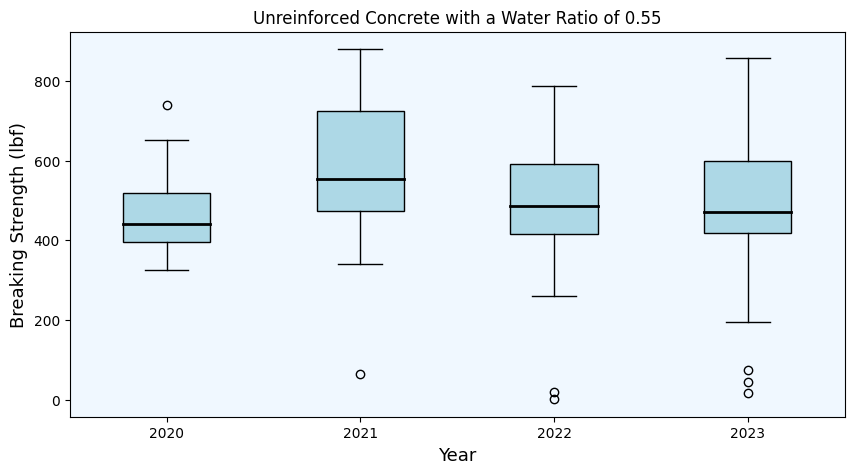

In [24]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111)

vals = {'2020': data2020_55['unreinforced'], '2021': data2021_55['unreinforced'], '2022': data2022_55['unreinforced'], '2023': data2023_55['unreinforced']}
ax.boxplot(vals.values(),patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markeredgecolor='black'),
            medianprops=dict(color='black', linewidth=2),)
ax.set_facecolor('aliceblue')
ax.set_xticklabels(vals.keys())
ax.set_ylabel('Breaking Strength (lbf)', size = 13)
ax.set_xlabel('Year', size = 13)
ax.set_title('Unreinforced Concrete with a Water Ratio of 0.55')

Based off of the visualizations, the data from 2020 may be significantly different from the other years.

### Compare P-Values of Different Years

#### Water Ratio: 0.50

Is the difference in the mean between 2020 and 2021 for unreinforced concrete at a water ratio of 0.55 statistically significant?


In [25]:
stats.ttest_ind(data2020_50['unreinforced'], data2021_50['unreinforced'], axis=0)

Ttest_indResult(statistic=-5.5478789652828135, pvalue=3.7223406867572385e-07)

#### Water Ratio: 0.55

Is the difference in the mean between 2021 and 2023 for unreinforced concrete at a water ratio of 0.55 statistically significant?

In [26]:
stats.ttest_ind(data2021_55['unreinforced'], data2023_55['unreinforced'], axis=0)

Ttest_indResult(statistic=2.6355650880959276, pvalue=0.009982306651204021)

Is the difference in the mean between 2020 and 2022 for unreinforced concrete at a water ratio of 0.55 statistically significant?

In [27]:
stats.ttest_ind(data2020_55['unreinforced'], data2022_55['unreinforced'], axis=0)

Ttest_indResult(statistic=-1.1827757557655552, pvalue=0.24040128359715768)

Is the difference in the mean between 2020 and 2023 for unreinforced concrete at a water ratio of 0.55 statistically significant?

In [28]:
stats.ttest_ind(data2020_55['unreinforced'], data2023_55['unreinforced'], axis=0)

Ttest_indResult(statistic=-0.5578931435702279, pvalue=0.5783838024735231)

### Compare means within the same year.

Is the difference in mean between unreinforced concrete with a water ratio of 0.5 significantly different from the mean with a water ratio of 0.55 in the same year?

2020

In [29]:
## Unreinforced
stats.ttest_ind(data2020_50['unreinforced'], data2020_55['unreinforced'], axis=0)

Ttest_indResult(statistic=-1.2641184378582377, pvalue=0.2101021923744449)

In [30]:
## Reinforced
stats.ttest_ind(data2020_50['reinforced'], data2020_55['reinforced'], axis=0)

Ttest_indResult(statistic=-1.0666431782217627, pvalue=0.28955457077357494)

2021

In [31]:
## Unreinforced
stats.ttest_ind(data2021_50['unreinforced'], data2021_55['unreinforced'], axis=0)

Ttest_indResult(statistic=0.9214797611889503, pvalue=0.35937783030632064)

In [32]:
## Reinforced
stats.ttest_ind(data2021_50['reinforced'], data2021_55['reinforced'], axis=0)

Ttest_indResult(statistic=0.5255878707077615, pvalue=0.6005271783150479)

2022

In [33]:
## Unreinforced
stats.ttest_ind(data2022_50['unreinforced'], data2022_55['unreinforced'], axis=0)

Ttest_indResult(statistic=2.1039928839602364, pvalue=0.039252120157151654)

In [34]:
## Reinforced
stats.ttest_ind(data2022_50['reinforced'], data2022_55['reinforced'], axis=0)

Ttest_indResult(statistic=2.619433452633922, pvalue=0.010950417844113287)

2023

In [35]:
## Unreinforced
stats.ttest_ind(data2023_50['unreinforced'], data2023_55['unreinforced'], axis=0)

Ttest_indResult(statistic=1.584789717442967, pvalue=0.1164832948672539)

In [36]:
## Reinforced
stats.ttest_ind(data2023_50['reinforced'], data2023_55['reinforced'], axis=0)

Ttest_indResult(statistic=2.669288374305924, pvalue=0.009001319184859491)